## Unsupervised Transformations for Data Exploration and Visualization:
    -  Principle Component Analysis (PCA)
    -  Non-negative Matrix Factorization (NMF)
    -  t-SNE manifold learning

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy import stats

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv('C:/Users/rhash/Documents/Datasets/mnist.csv')

# To Shuffle the data:
np.random.seed(42)
df=df.reindex(np.random.permutation(df.index))
df.reset_index(inplace=True, drop=True)

X=df.drop(['5'], axis=1)
y=df['5']

In [3]:
np.arange(0, 10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

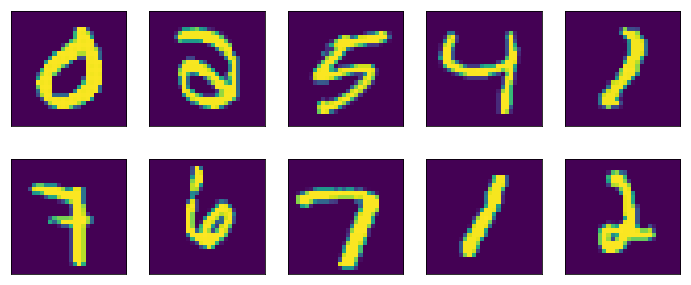

In [4]:
fig, axes = plt.subplots(2, 5, figsize=(12, 5)) 

for ax, i in zip(axes.ravel(), np.arange(0, 10)):   
    ax.matshow(np.array(X)[i,:].reshape(28,28))
    ax.set_xticks([])
    ax.set_yticks([])

In [5]:
# Re-scaling of data:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler=MinMaxScaler().fit(X)
X_scaled=scaler.transform(X)

In [6]:
X.shape

(2000, 784)

In [7]:
#scaler=StandardScaler()
#X_scaled=scaler.fit_transform(X)

In [8]:
# PCA: _________________
from sklearn.decomposition import PCA 

pca=PCA(n_components=100, whiten=True, random_state=42)
pca.fit(X_scaled)
X_pca=pca.transform(X_scaled)

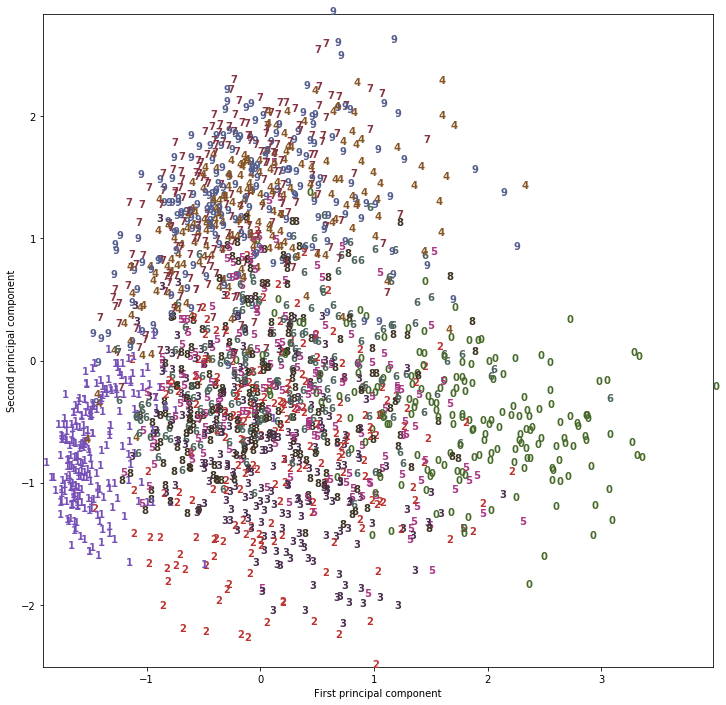

In [9]:
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525", "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"] 
plt.figure(figsize=(12, 12)) 
plt.xlim(X_pca[:, 0].min(), X_pca[:, 0].max()) 
plt.ylim(X_pca[:, 1].min(), X_pca[:, 1].max()) 

for i in range(len(X_scaled)):    
    # actually plot the digits as text instead of using scatter    
    plt.text(X_pca[i, 0], X_pca[i, 1], str(y[i]), color = colors[y[i]],  
             fontdict={'weight': 'bold', 'size': 10}) 
    plt.xlabel("First principal component") 
    plt.ylabel("Second principal component") 

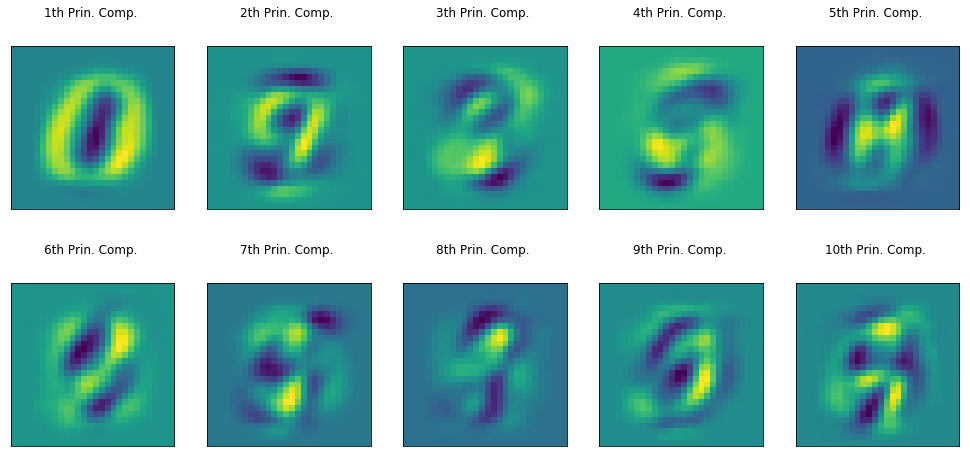

In [20]:
eigen_vectors=pca.components_[0:10]

fix, axes = plt.subplots(2, 5, figsize=(17, 8), subplot_kw={'xticks': (), 'yticks': ()}) 
for i, (component, ax) in enumerate(zip(pca.components_[0:10], axes.ravel())):    
    ax.matshow(eigen_vectors[i,:].reshape(28,28),  cmap='viridis')    
    ax.set_title("{}th Prin. Comp. \n".format((i + 1))) 
    ax.set_xticks([])
    ax.set_yticks([])
    plt.tight_layout

In [11]:
X_back_scaled=pca.inverse_transform(X_pca)

X_back=scaler.inverse_transform(X_back_scaled)

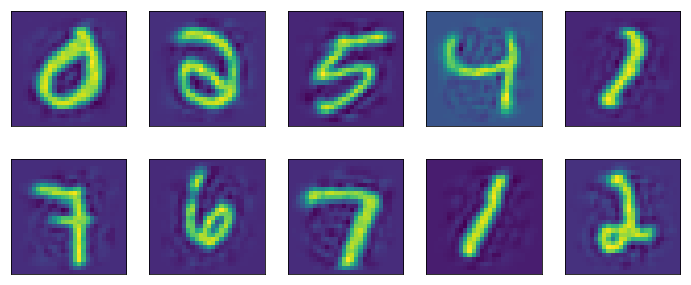

In [12]:
fig, axes = plt.subplots(2, 5, figsize=(12, 5)) 

for ax, i in zip(axes.ravel(), np.arange(0, 10)):   
    ax.matshow(np.array(X_back)[i,:].reshape(28,28))
    ax.set_xticks([])
    ax.set_yticks([])

In [13]:
# NMF: _________________________________________________________________
from sklearn.decomposition import NMF 
nmf = NMF(n_components=10, random_state=42) 

# use fit_transform instead of fit, as TSNE has no transform method 
X_nmf = nmf.fit_transform(X_scaled)

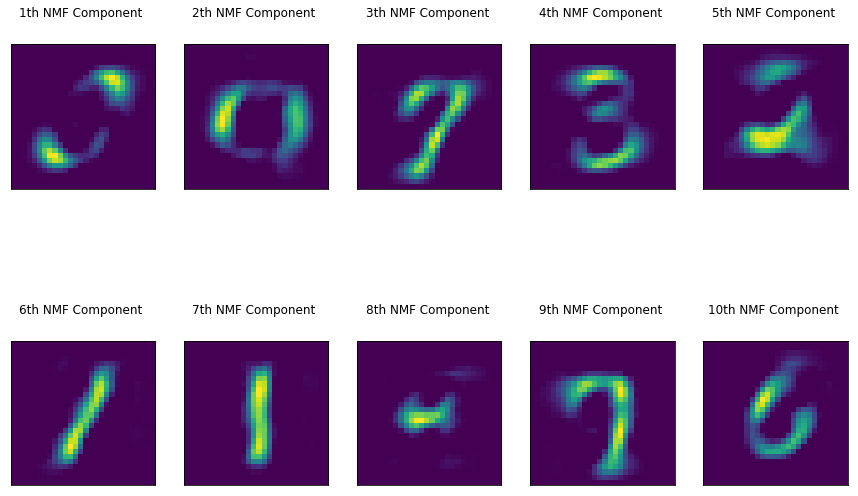

In [14]:
eigen_vectors=nmf.components_[0:10]

fix, axes = plt.subplots(2, 5, figsize=(15, 10), subplot_kw={'xticks': (), 'yticks': ()}) 
for i, (component, ax) in enumerate(zip(eigen_vectors, axes.ravel())):    
    ax.matshow(eigen_vectors[i,:].reshape(28, 28),  cmap='viridis')    
    ax.set_title("{}th NMF Component \n".format((i + 1))) 
    ax.set_xticks([])
    ax.set_yticks([])
    plt.tight_layout

In [15]:
X_back_scaled=nmf.inverse_transform(X_nmf)
X_back=scaler.inverse_transform(X_back_scaled)

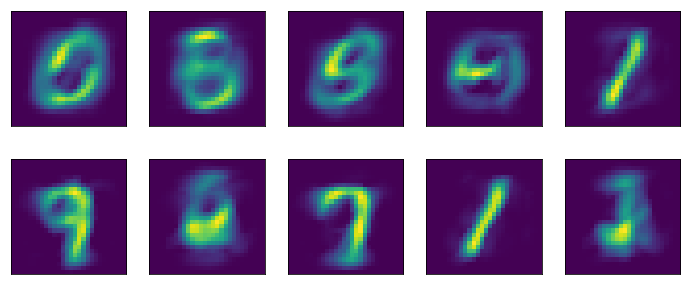

In [16]:
fig, axes = plt.subplots(2, 5, figsize=(12, 5)) 

for ax, i in zip(axes.ravel(), np.arange(0, 10)):   
    ax.matshow(np.array(X_back)[i,:].reshape(28,28))
    ax.set_xticks([])
    ax.set_yticks([])

In [17]:
# Manifold Learning with t-SNE ____________________________________________________
from sklearn.manifold import TSNE 
tsne = TSNE(random_state=42) 

# use fit_transform instead of fit, as TSNE has no transform method 
X_tsne = tsne.fit_transform(X_scaled)

In [18]:
X_tsne.shape

(2000, 2)

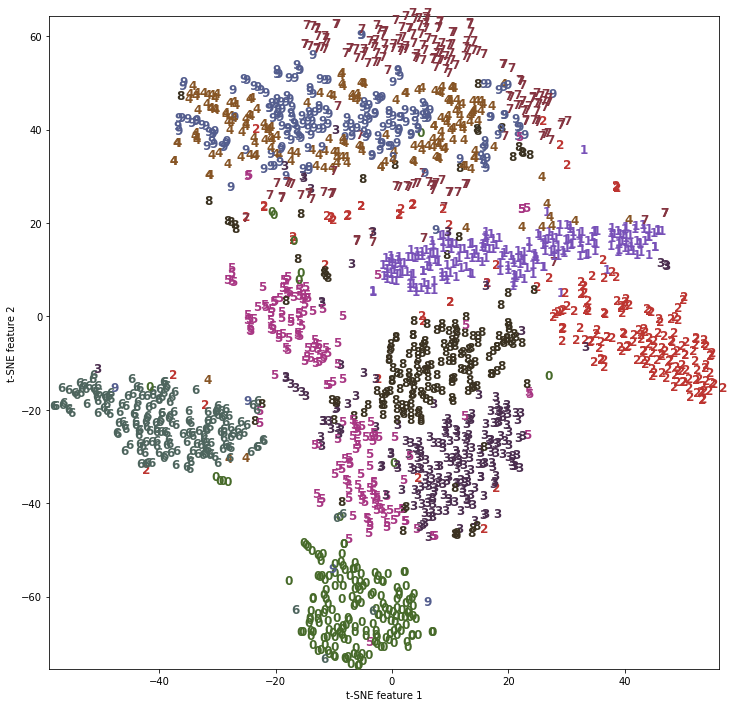

In [19]:
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525", "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"] 
plt.figure(figsize=(12, 12)) 
plt.xlim(X_tsne[:, 0].min(), X_tsne[:, 0].max()) 
plt.ylim(X_tsne[:, 1].min(), X_tsne[:, 1].max()) 

for i in range(len(X_scaled)):    
    # actually plot the digits as text instead of using scatter    
    plt.text(X_tsne[i, 0], X_tsne[i, 1], str(y[i]), color = colors[y[i]],  fontdict={'weight': 'bold', 'size': 12}) 
    plt.xlabel("t-SNE feature 1") 
    plt.ylabel("t-SNE feature 2") 